In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
import os
from PIL import Image
import tempfile


#Power of 2 function, Constraints!!

In [ ]:
def is_power_of_2(block_size):
    if block_size > 2 and math.log2(block_size).is_integer():
        return True
    else:
        return False

#Input Arguments

In [ ]:
image_filename_lzw = input("Enter image path: ")
while not image_filename_lzw:
  image_filename_lzw = input("Enter image path: ")
block_size_lzw = int(input("Enter block size( power of 2 and > 2 ): "))
input_img_lzw = cv2.imread(image_filename_lzw, cv2.IMREAD_GRAYSCALE)
if block_size_lzw != -1 :

  while not is_power_of_2(block_size_lzw) :
      block_size_lzw = int(input("Enter block size( power of 2 ): "))
else :
  pass
code_size_lzw = int(input("Enter code size( > 8 ): "))

while not code_size_lzw > 8 :
  code_size_lzw = int(input("Enter code size( > 8 ): "))

input_img_lzw = cv2.imread(image_filename_lzw, cv2.IMREAD_GRAYSCALE)

Enter image path: /content/drive/MyDrive/DIP/dataset/assignment 4/book-cover.tif
Enter block size( power of 2 and > 2 ): 8
Enter code size( > 8 ): 9


In [ ]:
if input_img_lzw.any() == None:
    print("No file read!. Try again!")

#Input image

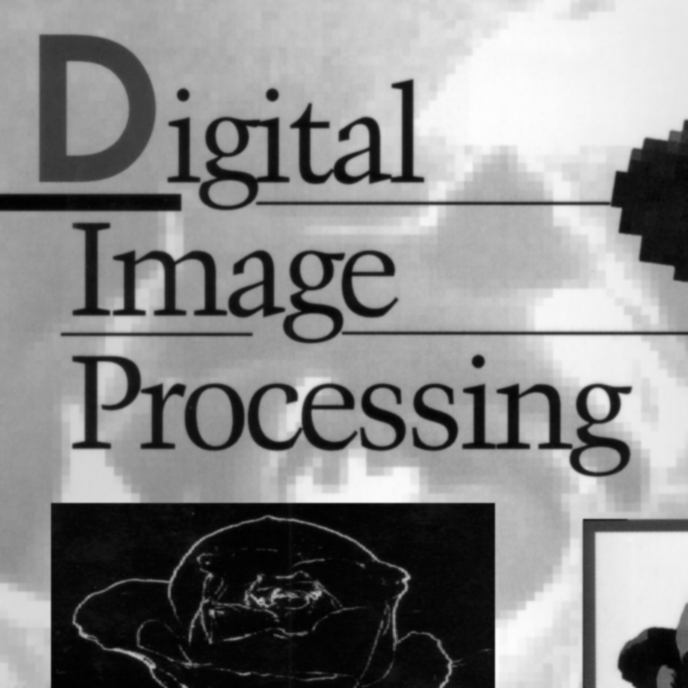

In [ ]:
if block_size_lzw == -1 :
  height = min(input_img_lzw.shape[0], input_img_lzw.shape[1])
  input_img_lzw = cv2.resize(input_img_lzw, (height, height))
cv2_imshow(input_img_lzw)

# Function to divide images in blocks

In [ ]:
def divide_image_into_blocks_lzw(image, block_size=8):

    height, width = image.shape[:2]
    num_blocks_row = height // block_size
    num_blocks_col = width // block_size

    blocks = []
    for i in range(num_blocks_row):
        for j in range(num_blocks_col):
            row_start = i * block_size
            row_end = row_start + block_size
            col_start = j * block_size
            col_end = col_start + block_size
            block = image[row_start:row_end, col_start:col_end]
            if block.shape != (block_size, block_size):
                # Pad the block with zeros if its size is less than block_size x block_size
                pad_height = block_size - block.shape[0]
                pad_width = block_size - block.shape[1]
                if len(image.shape) == 3:  # Color image
                    block = np.pad(block, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
                else:  # Grayscale image
                    block = np.pad(block, ((0, pad_height), (0, pad_width)), mode='constant', constant_values=0)
            blocks.append(block)

    return blocks



In [ ]:
if block_size_lzw != -1 :
  blocks_lzw = divide_image_into_blocks_lzw(input_img_lzw, block_size_lzw)

else :
  blocks_lzw = divide_image_into_blocks_lzw(input_img_lzw, input_img_lzw.shape[0])

#Function to calculate total number of blocks

In [ ]:
a = 0
for i, block in enumerate(blocks_lzw):
  a += 1

In [ ]:
print(a)


7396


#Function of LZW encoding

In [ ]:
def lzw_encode(image_blocks, code_size):
    dictionary = {str(i): i for i in range(256)}
    dict_size = 256

    output = []
    block_outputs = []
    max_dict_size = 2 ** code_size

    current_string = str(image_blocks[0][0])
    for row in range(image_blocks.shape[0]):
        for col in range(image_blocks.shape[1]):
            next_value = image_blocks[row][col]
            new_string = current_string + ' ' + str(next_value)
            if new_string in dictionary:
                current_string = new_string
            else:
                code = dictionary[current_string]
                block_outputs.append(code)

                if dict_size < max_dict_size:
                    dictionary[new_string] = dict_size
                    dict_size += 1
                else:
                    block_outputs.extend([dictionary[current_string]] * ((block.shape[0] - row) * (block.shape[1] - col)))
                    break

                current_string = str(next_value)
        if dict_size >= max_dict_size:
            block_outputs.extend([dictionary[current_string]] * ((block.shape[0] - row - 1) * (block.shape[1] - col)))
            break
    code = dictionary[current_string]
    block_outputs.append(code)
    output.extend(block_outputs)

    return block_outputs, dictionary

In [ ]:
len(blocks_lzw)

7396

In [ ]:
type(blocks_lzw[0])

numpy.ndarray

In [ ]:
encoded_data_list = []
dictionary_data_list = []
for blocks in blocks_lzw :
  encoded_data, dictionary = lzw_encode(blocks, code_size_lzw)
  encoded_data_list.append(encoded_data)
  dictionary_data_list.append(dictionary)



#Function to calculate maximum value in the dictionary

In [ ]:
max_value = None
list_max_values = []
for blocks in dictionary_data_list :
  for value in blocks.values():
      if max_value is None or value > max_value:
          max_value = value
  list_max_values.append(max_value)
max_value_lzw = max(list_max_values)


In [ ]:
print("The maximum integer value in the dictionary is:", max_value_lzw)


The maximum integer value in the dictionary is: 319


#Function to find total number of codes present in the dictionary

In [ ]:
total_codes_dictionary = 0
for blocks in dictionary_data_list :
  total_code = len(blocks)
  total_codes_dictionary += total_code


In [ ]:
print("The total number of codes in the dictionary is:", total_codes_dictionary)


The total number of codes in the dictionary is: 2221791


#Function to calculate average encoded length

In [ ]:
average_encoded_length_lzw = 0
count = 0
for blocks in encoded_data_list:
  encoded_data = blocks
  total_encoded_length = sum(len(str(code)) for code in encoded_data)
  if(len(encoded_data) != 0) :
    average_encoded_length = total_encoded_length / len(encoded_data)

  else :
    average_encoded_length = 0
  average_encoded_length_lzw +=  average_encoded_length
  count += 1

In [ ]:
print("The average length of encoded pixels in LZW encoding is:", average_encoded_length_lzw / count)


The average length of encoded pixels in LZW encoding is: 2.737568308501091


#Function to calculate average entropy

In [ ]:
def calculate_entropy(encoded_data):
    # Step 1: Count the frequency of occurrence of each unique encoded symbol or code
    frequency = {}
    total_symbols = len(encoded_data)
    for symbol in encoded_data:
        if symbol in frequency:
            frequency[symbol] += 1
        else:
            frequency[symbol] = 1

    # Step 2: Calculate the probability of each encoded symbol or code
    probabilities = {symbol: count / total_symbols for symbol, count in frequency.items()}

    # Step 3: Calculate the information content of each encoded symbol or code
    information_content = {symbol: -math.log2(probability) for symbol, probability in probabilities.items()}

    # Step 4: Multiply the information content by the probability to get the contribution to entropy
    entropy = sum(information_content[symbol] * probabilities[symbol] for symbol in information_content)

    return entropy



In [ ]:
entropy_lzw = 0
count = 0

for blocks in encoded_data_list :
  entropy = calculate_entropy(blocks)
  entropy_lzw += entropy
  count += 1

In [ ]:
print("The entropy of the LZW-encoded data is:", entropy_lzw / count)

The entropy of the LZW-encoded data is: 4.500724211357066


#Writing encoded data in a text file

In [ ]:
text_filename_lzw = image_filename_lzw + '_lzwcode.txt'
if os.path.exists(text_filename_lzw):
    # If the file exists, delete its contents
    with open(text_filename_lzw, 'w') as file:
        file.truncate(0)

with open(text_filename_lzw, 'w') as fp:
    fp.write("%s %s %s\n" % (input_img_lzw.shape[0], input_img_lzw.shape[1], block_size_lzw))
    for item in encoded_data_list :
        # write each item on a new line
        fp.write("%s\n" % (item))
    # fp.write("%s\n" % (dictionary))
    print('Done')

Done


#**LZW DECODING**

# Reading image height width and block size from the file

In [ ]:
# Open the text file in read mode
with open(text_filename_lzw, 'r') as file:
    # Read the first line from the file
    first_row = file.readline().rstrip()

# Split the first row by spaces to get individual values
values = first_row.split(' ')

# Store the values in separate variables
lzw_encoded_img_height = int(values[0])
lzw_encoded_img_width = int(values[1])
text_lzw_block_size = int(values[2])



In [ ]:
lzw_encoded_img_height, lzw_encoded_img_width, text_lzw_block_size

(688, 688, 8)

#Splitting data as integers from the text file

In [ ]:
lzw_read_text_list = []
# Read the text file and split it by lines
with open(text_filename_lzw, "r") as file:
    lines = file.read()
    lines = lines.split('\n')

    lines = lines[1:-1]

    for line in lines:
      line = eval(line)
      lzw_read_text_list.append(line)


In [ ]:
encoded_data_list == lzw_read_text_list

True

In [ ]:
for i in range(0, len(encoded_data_list)) :
  if encoded_data_list[i] != lzw_read_text_list[i] :
    print("hi")



#Function of LZW decoding

In [ ]:
def lzw_decode(encoded_data, dictionaries, blockSize):
    decoded_data = []

    for blocks, dictionary in zip(encoded_data, dictionaries):
        block_data = []
        for i in range(len(blocks)):
            code = list(dictionary.keys())[list(dictionary.values())[blocks[i]]]
            code = code.split()

            for value in code:
                block_data.append(int(value))

        block_data = block_data[1:]

        if len(block_data) < blockSize * blockSize:
              block_data.extend([0] * ((blockSize * blockSize) - len(block_data)))

        decoded_data.append(block_data)

    return decoded_data


In [ ]:
decoded_data = lzw_decode(lzw_read_text_list,dictionary_data_list, text_lzw_block_size)

In [ ]:
# np.unique(np.array(input_img_lzw))

In [ ]:
# np.unique(np.array(decoded_data))

# Converting 1d list to 2d lists

In [ ]:
def convert_1d_to_2d(decoded_data_lzw, block_size_lzw):
    # Create a new list to store the converted 2D lists
    decoded_data_lzw_2d = []

    # Loop through each 1D list in decoded_data_lzw
    for block in decoded_data_lzw:
        # Create a new 2D list with shape (block_size_lzw, block_size_lzw)
        block_2d = []
        for i in range(0, len(block), block_size_lzw):
            # Slice the 1D list to extract a row of length block_size_lzw
            row = block[i:i+block_size_lzw]
            # If the row is shorter than block_size_lzw, append 0s to make it of size block_size_lzw
            if len(row) < block_size_lzw:
                row += [0] * (block_size_lzw - len(row))
            # Append the row to the 2D list
            block_2d.append(row)

        # Append the 2D list to decoded_data_lzw_2d
        decoded_data_lzw_2d.append(block_2d)

    return decoded_data_lzw_2d


In [ ]:
if block_size_lzw != -1:
    decoded_data_lzw_2d = convert_1d_to_2d(decoded_data, block_size_lzw)
else:
    decoded_data_lzw_2d = []

    for i in range(0, input_img_lzw.shape[0] * input_img_lzw.shape[0], input_img_lzw.shape[0]):
        decoded_data_lzw_2d.append(decoded_data[0][i:i+input_img_lzw.shape[0]])

    decoded_data_lzw_2d = np.array(decoded_data_lzw_2d).astype(np.uint8)

#Merging of the blocks to create 1 block

In [ ]:
def create_image_from_blocks(blocks, height, width, block_size=block_size_lzw):

    num_blocks_row = height // block_size
    num_blocks_col = width // block_size
    image = np.zeros((height, width), dtype=np.uint8)

    for i in range(num_blocks_row):
        for j in range(num_blocks_col):
            row_start = i * block_size
            row_end = row_start + block_size
            col_start = j * block_size
            col_end = col_start + block_size
            image[row_start:row_end, col_start:col_end] = blocks[i * num_blocks_col + j]

    return image


In [ ]:
if block_size_lzw != -1:
    reconstructed_img_lzw = create_image_from_blocks(decoded_data_lzw_2d, lzw_encoded_img_height, lzw_encoded_img_width)
else:
    reconstructed_img_lzw = decoded_data_lzw_2d

#Display of the Reconstructed image

In [ ]:
reconstructed_img_lzw - input_img_lzw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

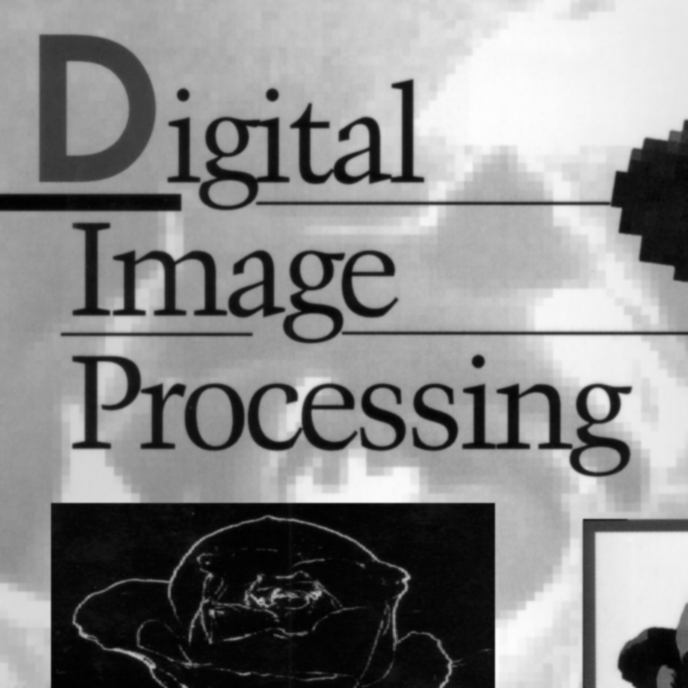

In [ ]:
cv2_imshow(reconstructed_img_lzw)

#RMSE

In [ ]:
diff_lzw = np.subtract(input_img_lzw, reconstructed_img_lzw)
squared_diff_lzw = np.square(diff_lzw)
mean_squared_diff_lzw = np.mean(squared_diff_lzw)
rmse_lzw = np.sqrt(mean_squared_diff_lzw)

In [ ]:
print('RMSE between Original Image and Reconstructed Image: {:.3f}'.format(rmse_lzw))

RMSE between Original Image and Reconstructed Image: 0.000


#PSNR

In [ ]:
mse_lzw = np.mean((input_img_lzw - reconstructed_img_lzw) ** 2)
max_pixel_value = 255
psnr_lzw = 10 * np.log10((max_pixel_value ** 2) / mse_lzw)


<ipython-input-55-a6e367efe7f7>:3: RuntimeWarning: divide by zero encountered in double_scalars
  psnr_lzw = 10 * np.log10((max_pixel_value ** 2) / mse_lzw)


In [ ]:
print('PSNR between original image and reconstructed image: {:.3f} dB'.format(psnr_lzw))

PSNR between original image and reconstructed image: inf dB


#Compression Ratio

In [ ]:
original_image_size_lzw = os.path.getsize(image_filename_lzw)
with tempfile.TemporaryDirectory() as temp_dir:
    temp_file_lzw = os.path.join(temp_dir, 'lzw_reconstructed_image.jpg')
    cv2.imwrite(temp_file_lzw, reconstructed_img_lzw)
    reconstructed_file_size_lzw = os.path.getsize(temp_file_lzw)
compression_ratio_lzw = original_image_size_lzw / reconstructed_file_size_lzw

In [ ]:
print(f'Compression ratio: {compression_ratio_lzw:.2f}')

Compression ratio: 4.42


In [ ]:
from prettytable import PrettyTable


In [ ]:
table = PrettyTable()

table.field_names = ['Metric', "Value"]
table.align["Metric"] = "l"
table.align["Value"] = "r"
table.add_row(["Compression Ratio (LZW)", round(compression_ratio_lzw, 2)])
table.add_row(["Entropy (LZW)", round(entropy_lzw, 2)])
table.add_row(["Average Encoded Length (LZW)", round(average_encoded_length_lzw, 2)])
table.add_row(["Max Value in dictionary", max_value])
table.add_row(["Total Codes Dictionary", total_codes_dictionary])
table.add_row(["Block Size", block_size_lzw])
table.add_row(["Code Size", code_size_lzw])

print(table)

+------------------------------+----------+
| Metric                       |    Value |
+------------------------------+----------+
| Compression Ratio (LZW)      |     4.42 |
| Entropy (LZW)                | 33287.36 |
| Average Encoded Length (LZW) | 20247.06 |
| Max Value in dictionary      |      319 |
| Total Codes Dictionary       |  2221791 |
| Block Size                   |        8 |
| Code Size                    |        9 |
+------------------------------+----------+
